In [6]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('checkouts_export_1.csv')

In [8]:
df.columns

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

In [27]:
df['Risk Level'].unique()

array(['Low', nan], dtype=object)

In [70]:
def get_similar_columns(df, columns_not_to_consider, name):
    columns = list(set(df.columns) - set(columns_not_to_consider))
    possible_columns = [column for column in columns if name in column.lower()]
    print(possible_columns)
    display(df[['Name'] + possible_columns].head(3))

In [73]:
get_similar_columns(df, columns_not_to_consider, 'shipping')

['Shipping Street', 'Shipping Phone', 'Shipping Province Name', 'Shipping Company', 'Shipping Province', 'Lineitem requires shipping']


,Name,Shipping Street,Shipping Phone,Shipping Province Name,Shipping Company,Shipping Province,Lineitem requires shipping
0,#22992649945239,"Rodriguez peña 25, Casa",11 4062-7399,Buenos Aires (provincia),NaN,B,True
1,#22992619307159,"Diagonal 92 , 171",11 5669-4798,Buenos Aires (provincia),NaN,B,True
2,#22992619307159,NaN,NaN,NaN,NaN,NaN,True


In [101]:
df['Financial Status'].unique()

array([nan])

In [107]:
useless_columns = [
    'Currency', 'Subtotal', 'Shipping', 'Taxes', 'Total', 'Discout', 'Notes', 'Vendor', 'Paid at',
    'Tax 1 Value', 'Tax 2 Value', 'Tax 3 Value', 'Tax 4 Value', 'Tax 5 Value',
    'Tax 1 Name', 'Tax 2 Name', 'Tax 3 Name', 'Tax 4 Name', 'Tax 5 Name',
    'Fulfillment Status', 'Cancelled at', 'Risk Level', 'Id', 'Lineitem fulfillment status', 'Fulfilled at',
    'Receipt Number', 'Payment Reference', 'Note Attributes', 'Name', 'Shipping Province', 'Shipping Company',
    'Lineitem requires shipping', 'Phone', 'Billing Company', 'Lineitem sku', 'Billing Province', 'Billing Street',
    'Financial Status', 'Tags', 'Refunded Amount', 'Lineitem taxable'
]
stage_0_columns = ['Email', 'Accepts Marketing', 'Shipping Method']
stage_1_columns = ['Shipping Country', 'Shipping Name',
                   'Shipping Address1','Shipping Address2', 'Shipping Zip', 'Shipping City', 'Shipping Province Name',
                  'Shipping Phone']
stage_2_columns = ['Shipping Street']
stage_3_columns = ['Payment Method', 'Billing Country', 'Billing Name',
                   'Billing Address1','Billing Address2', 'Billing Zip', 'Billing City', 'Billing Province Name',
                  'Billing Phone']

important_columns = ['Name']
independent_of_stage_columns = ['Source', 'Lineitem name', 'Lineitem price', 'Lineitem compare at price', 'Lineitem discount',
                                'Lineitem quantity', 'Created at', 'Discount Amount', 'Discount Code']

columns_not_to_consider = list(set(useless_columns) | set(stage_0_columns) | set(stage_1_columns) | set(stage_2_columns) | set(stage_3_columns) | set(independent_of_stage_columns) | set(important_columns))
remaining_columns = list(set(df.columns) - set(columns_not_to_consider))

In [64]:
df[df['Name'] =='#22982011945111']

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Billing Province Name,Shipping Province Name
13,#22982011945111,vaninascarro@gmail.com,NaN,NaN,unfulfilled,NaN,yes,ARS,8100.0,0.0,0.0,8100.0,NaN,0.0,Envio a Domicilio,2022-04-10 23:20:19 -0300,1,Kit Edad de Oro,5400.0,6000.0,NaN,True,True,pending,Vanina Carro,"Balbín 3715, Casa, Casa, Casa","Balbín 3715, Casa, Casa",Casa,NaN,Saavedra,'1430,C,AR,011 6801-0195,Vanina Carro,"Balbín 3715, Casa, Casa, Casa","Balbín 3715, Casa, Casa",Casa,NaN,Saavedra,'1430,C,AR,011 6801-0195,NaN,NaN,NaN,NaN,NaN,0.0,mishinpi,2.298201e+13,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
14,#22982011945111,vaninascarro@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-10 23:20:19 -0300,1,Crema Antiage 360°,2700.0,3200.0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mishinpi,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df['reached_stage_0'] = df[stage_0_columns].notna().max(axis=1).replace({True: 1, False: 0})
df['reached_stage_1'] = df[stage_1_columns].notna().max(axis=1).replace({True: 1, False: 0})
df['reached_stage_2'] = df[stage_2_columns].notna().max(axis=1).replace({True: 1, False: 0})
df['reached_stage_3'] = df[stage_3_columns].notna().max(axis=1).replace({True: 1, False: 0})

In [119]:
df[stage_0_columns].head()

,Email,Accepts Marketing,Shipping Method
0,mariabelenreguer@gmail.com,yes,Envio a Domicilio
1,lolagoni@hotmail.com,yes,Envio a Domicilio
2,lolagoni@hotmail.com,NaN,NaN
3,barbaraspagnoli@hotmail.com,yes,Envio a Domicilio
4,vanina_tosoni@yahoo.com.ar,yes,Envio a Domicilio


In [127]:
stage_1_columns

['Shipping Country',
 'Shipping Name',
 'Shipping Address1',
 'Shipping Address2',
 'Shipping Zip',
 'Shipping City',
 'Shipping Province Name',
 'Shipping Phone']

In [129]:
stage_3_columns

['Payment Method',
 'Billing Country',
 'Billing Name',
 'Billing Address1',
 'Billing Address2',
 'Billing Zip',
 'Billing City',
 'Billing Province Name',
 'Billing Phone']

<AxesSubplot:xlabel='index'>

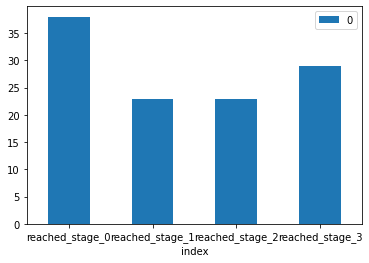

In [126]:
df[['reached_stage_0', 'reached_stage_1', 'reached_stage_2', 'reached_stage_3']].sum().reset_index()
.plot.bar(x='index', y=0, rot=0)

In [115]:
df[stage_0_columns].notna().head(10)

,Email,Accepts Marketing,Shipping Method
0,True,True,True
1,True,True,True
2,True,False,False
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,False,False


In [113]:
df[stage_0_columns].notna().max(axis=1)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
dtype: bool